In [1]:
!pip install ultralytics opencv-python-headless  plotly matplotlib
!pip install ipywidgets --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import time
from PIL import Image, ImageDraw, ImageFont
import io
import base64
from IPython.display import display, HTML, Image as IPImage
import pandas as pd
import imageio
from ultralytics import YOLO
import requests
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('dark_background')
sns.set_palette("husl")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Download sample images
def download_sample_images():
    urls = [
        "https://ultralytics.com/images/bus.jpg",
        "https://ultralytics.com/images/zidane.jpg",
        "https://images.unsplash.com/photo-1544717297-fa95b6ee9643?w=640",  # dogs
        "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?w=640",  # city street
        "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=640"   # mountain scene
    ]

    images = []
    names = ["bus", "person", "dogs", "street", "nature"]

    for i, url in enumerate(urls):
        try:
            response = requests.get(url)
            img = Image.open(io.BytesIO(response.content))
            img = img.resize((640, 640))  # Standardize size
            images.append(np.array(img))
            print(f"Downloaded {names[i]}")
        except:
            print(f"Failed to download {names[i]}, creating placeholder...")
            # Create a placeholder image
            img = np.random.randint(0, 255, (640, 640, 3), dtype=np.uint8)
            images.append(img)

    return images, names

# Download images
sample_images, image_names = download_sample_images()
print(f"\nReady with {len(sample_images)} test images!")

Downloaded bus
Downloaded person
Downloaded dogs
Downloaded street
Downloaded nature

Ready with 5 test images!


In [4]:
# Load different YOLO versions
def load_yolo_models():
    models = {}
    model_info = {
        'YOLOv5s': 'yolov5s.pt',
        'YOLOv8s': 'yolov8s.pt',
        'YOLOv8m': 'yolov8m.pt',
        'YOLOv8l': 'yolov8l.pt'
    }

    for name, model_path in model_info.items():
        try:
            print(f"Loading {name}...")
            model = YOLO(model_path)
            models[name] = model
            print(f"{name} loaded successfully")
        except Exception as e:
            print(f"Failed to load {name}: {e}")

    return models

# Load models
yolo_models = load_yolo_models()
print(f"\nLoaded {len(yolo_models)} YOLO models!")

Loading YOLOv5s...
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 127MB/s] 


YOLOv5s loaded successfully
Loading YOLOv8s...


100%|██████████| 21.5M/21.5M [00:00<00:00, 114MB/s] 


YOLOv8s loaded successfully
Loading YOLOv8m...


100%|██████████| 49.7M/49.7M [00:00<00:00, 296MB/s]


YOLOv8m loaded successfully
Loading YOLOv8l...


100%|██████████| 83.7M/83.7M [00:00<00:00, 293MB/s]


YOLOv8l loaded successfully

Loaded 4 YOLO models!


In [5]:
def compare_yolo_performance(image, models, image_name="test"):
    """
    Compare performance of different YOLO models
    """
    results = {}

    for model_name, model in models.items():
        print(f"Testing {model_name}...")

        # Time the inference
        start_time = time.time()

        # Run inference
        detection_results = model(image, verbose=False)

        end_time = time.time()
        inference_time = end_time - start_time

        # Extract results
        boxes = detection_results[0].boxes

        if boxes is not None:
            num_detections = len(boxes)
            confidences = boxes.conf.cpu().numpy() if len(boxes) > 0 else []
            avg_confidence = np.mean(confidences) if len(confidences) > 0 else 0
            classes = boxes.cls.cpu().numpy() if len(boxes) > 0 else []

            # Get annotated image
            annotated_image = detection_results[0].plot()
        else:
            num_detections = 0
            avg_confidence = 0
            classes = []
            annotated_image = image.copy()

        results[model_name] = {
            'inference_time': inference_time,
            'fps': 1.0 / inference_time,
            'num_detections': num_detections,
            'avg_confidence': avg_confidence,
            'classes': classes,
            'annotated_image': annotated_image
        }

        print(f"  Time: {inference_time:.3f}s ({1/inference_time:.1f} FPS)")
        print(f"  Detections: {num_detections}")
        print(f"  Avg Confidence: {avg_confidence:.3f}")
        print()

    return results

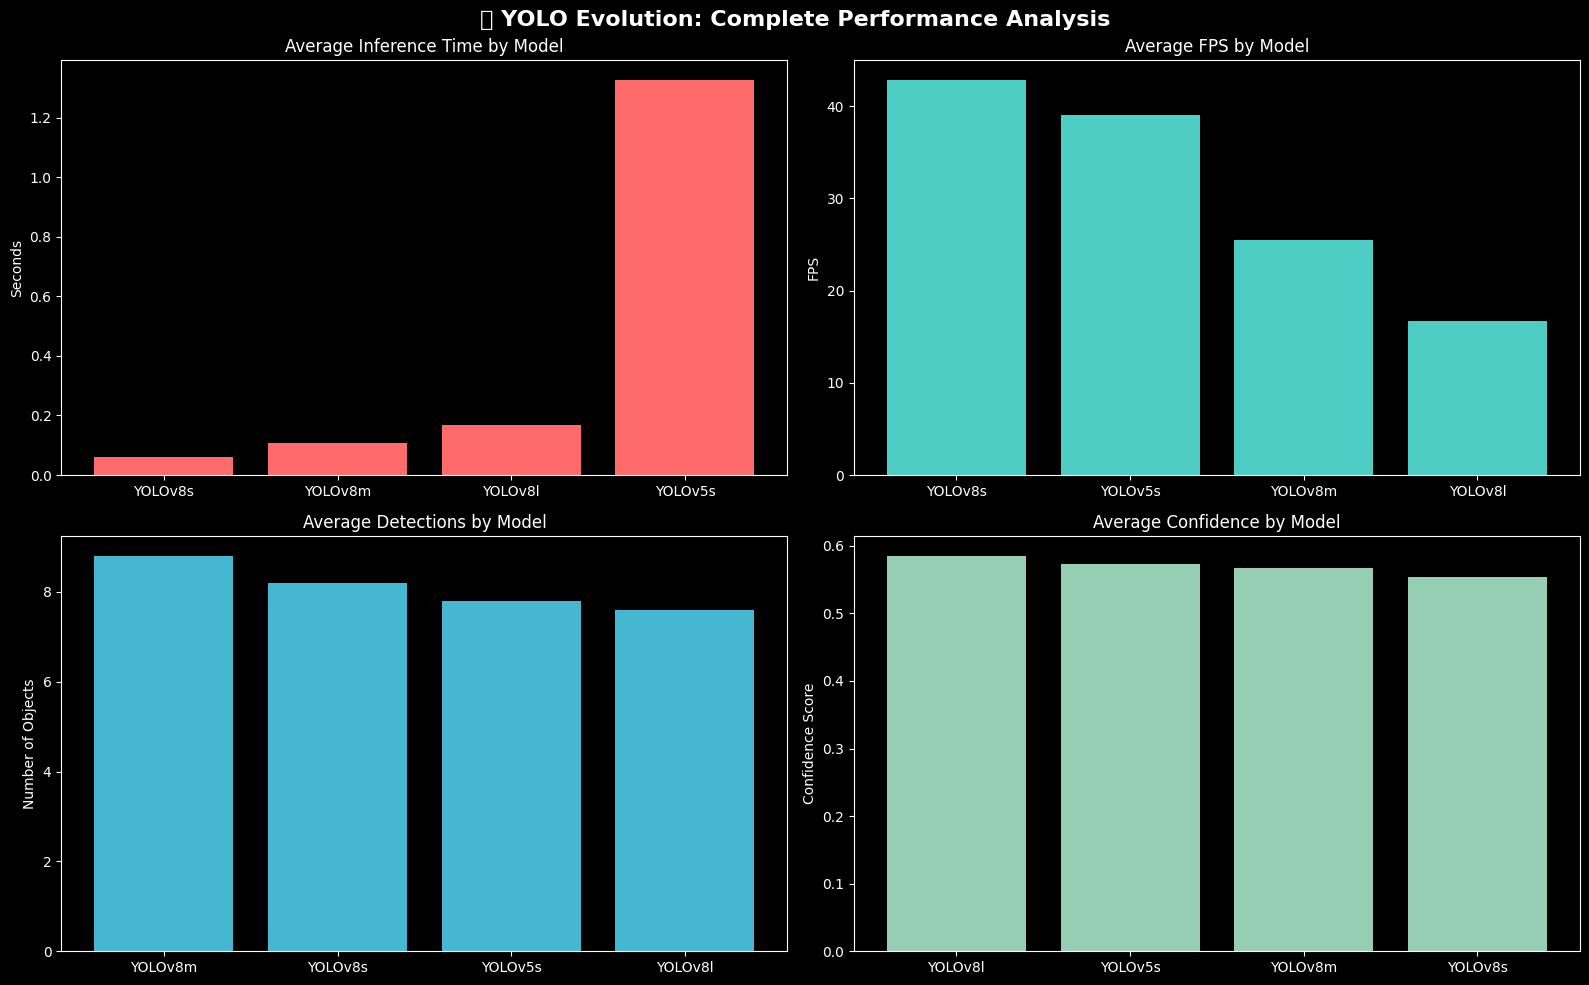


📋 SUMMARY TABLE
        Inference_Time            FPS         Detections         Avg_Confidence       
                  mean    std    mean     std       mean     std           mean    std
Model                                                                                 
YOLOv5s          1.327  2.920  39.005  22.875        7.8   9.985          0.572  0.347
YOLOv8l          0.166  0.260  16.703   9.077        7.6   7.956          0.585  0.351
YOLOv8m          0.106  0.164  25.488  13.534        8.8  10.710          0.567  0.332
YOLOv8s          0.061  0.092  42.878  24.608        8.2   9.834          0.554  0.334


In [25]:
def create_summary_statistics(all_results):
    """
    Create overall summary statistics
    """
    # Collect all data
    summary_data = []

    for image_name, results in all_results.items():
        for model_name, metrics in results.items():
            summary_data.append({
                'Image': image_name,
                'Model': model_name,
                'Inference_Time': metrics['inference_time'],
                'FPS': metrics['fps'],
                'Detections': metrics['num_detections'],
                'Avg_Confidence': metrics['avg_confidence']
            })

    df = pd.DataFrame(summary_data)

    # Create summary visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('📈 YOLO Evolution: Complete Performance Analysis',
                 fontsize=16, fontweight='bold', color='white')

    # Average inference time by model
    avg_inference = df.groupby('Model')['Inference_Time'].mean().sort_values()
    axes[0, 0].bar(avg_inference.index, avg_inference.values, color='#FF6B6B')
    axes[0, 0].set_title('Average Inference Time by Model', color='white')
    axes[0, 0].set_ylabel('Seconds', color='white')
    axes[0, 0].tick_params(colors='white')

    # Average FPS by model
    avg_fps = df.groupby('Model')['FPS'].mean().sort_values(ascending=False)
    axes[0, 1].bar(avg_fps.index, avg_fps.values, color='#4ECDC4')
    axes[0, 1].set_title('Average FPS by Model', color='white')
    axes[0, 1].set_ylabel('FPS', color='white')
    axes[0, 1].tick_params(colors='white')

    # Average detections by model
    avg_detections = df.groupby('Model')['Detections'].mean().sort_values(ascending=False)
    axes[1, 0].bar(avg_detections.index, avg_detections.values, color='#45B7D1')
    axes[1, 0].set_title('Average Detections by Model', color='white')
    axes[1, 0].set_ylabel('Number of Objects', color='white')
    axes[1, 0].tick_params(colors='white')

    # Average confidence by model
    avg_confidence = df.groupby('Model')['Avg_Confidence'].mean().sort_values(ascending=False)
    axes[1, 1].bar(avg_confidence.index, avg_confidence.values, color='#96CEB4')
    axes[1, 1].set_title('Average Confidence by Model', color='white')
    axes[1, 1].set_ylabel('Confidence Score', color='white')
    axes[1, 1].tick_params(colors='white')

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

    # Print summary table
    print("\n📋 SUMMARY TABLE")
    print("=" * 80)
    summary_stats = df.groupby('Model').agg({
        'Inference_Time': ['mean', 'std'],
        'FPS': ['mean', 'std'],
        'Detections': ['mean', 'std'],
        'Avg_Confidence': ['mean', 'std']
    }).round(3)

    print(summary_stats.to_string())

    return df

# Create summary
summary_df = create_summary_statistics(analysis_results)

visualizations created successfully!

Testing Image 1/5: bus
------------------------------
Testing YOLOv5s...
  Time: 0.042s (23.5 FPS)
  Detections: 5
  Avg Confidence: 0.820

Testing YOLOv8s...
  Time: 0.021s (47.6 FPS)
  Detections: 5
  Avg Confidence: 0.844

Testing YOLOv8m...
  Time: 0.041s (24.6 FPS)
  Detections: 7
  Avg Confidence: 0.720

Testing YOLOv8l...
  Time: 0.067s (15.0 FPS)
  Detections: 6
  Avg Confidence: 0.806

Creating dashboard for bus...


Creating detection comparison for bus...


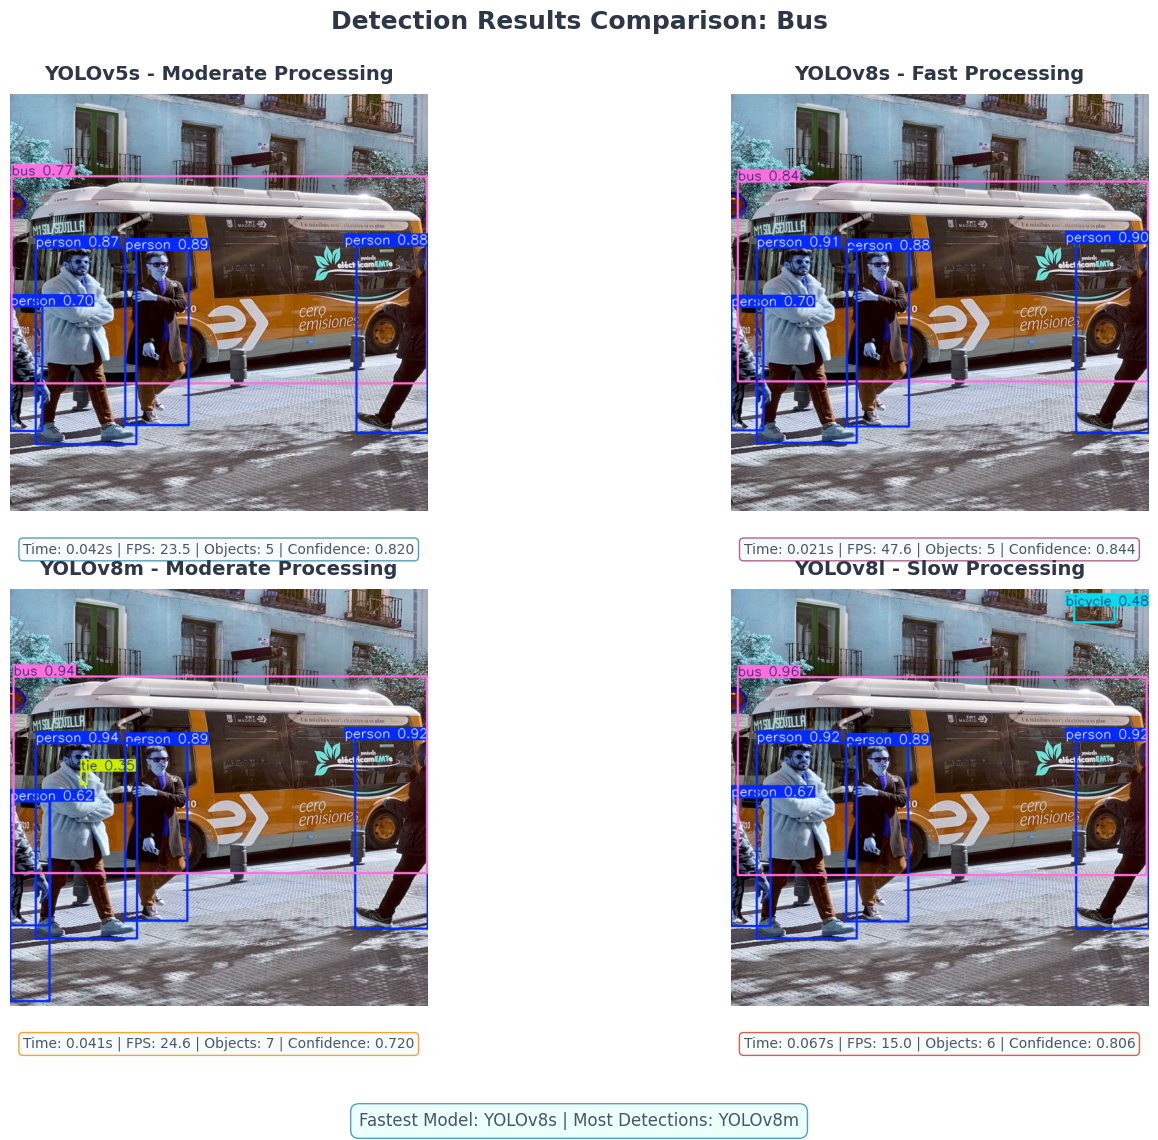

Analysis complete for bus

Testing Image 2/5: person
------------------------------
Testing YOLOv5s...
  Time: 0.020s (50.8 FPS)
  Detections: 2
  Avg Confidence: 0.747

Testing YOLOv8s...
  Time: 0.023s (42.8 FPS)
  Detections: 3
  Avg Confidence: 0.732

Testing YOLOv8m...
  Time: 0.031s (31.9 FPS)
  Detections: 2
  Avg Confidence: 0.804

Testing YOLOv8l...
  Time: 0.050s (20.0 FPS)
  Detections: 4
  Avg Confidence: 0.721

Creating dashboard for person...


Creating detection comparison for person...


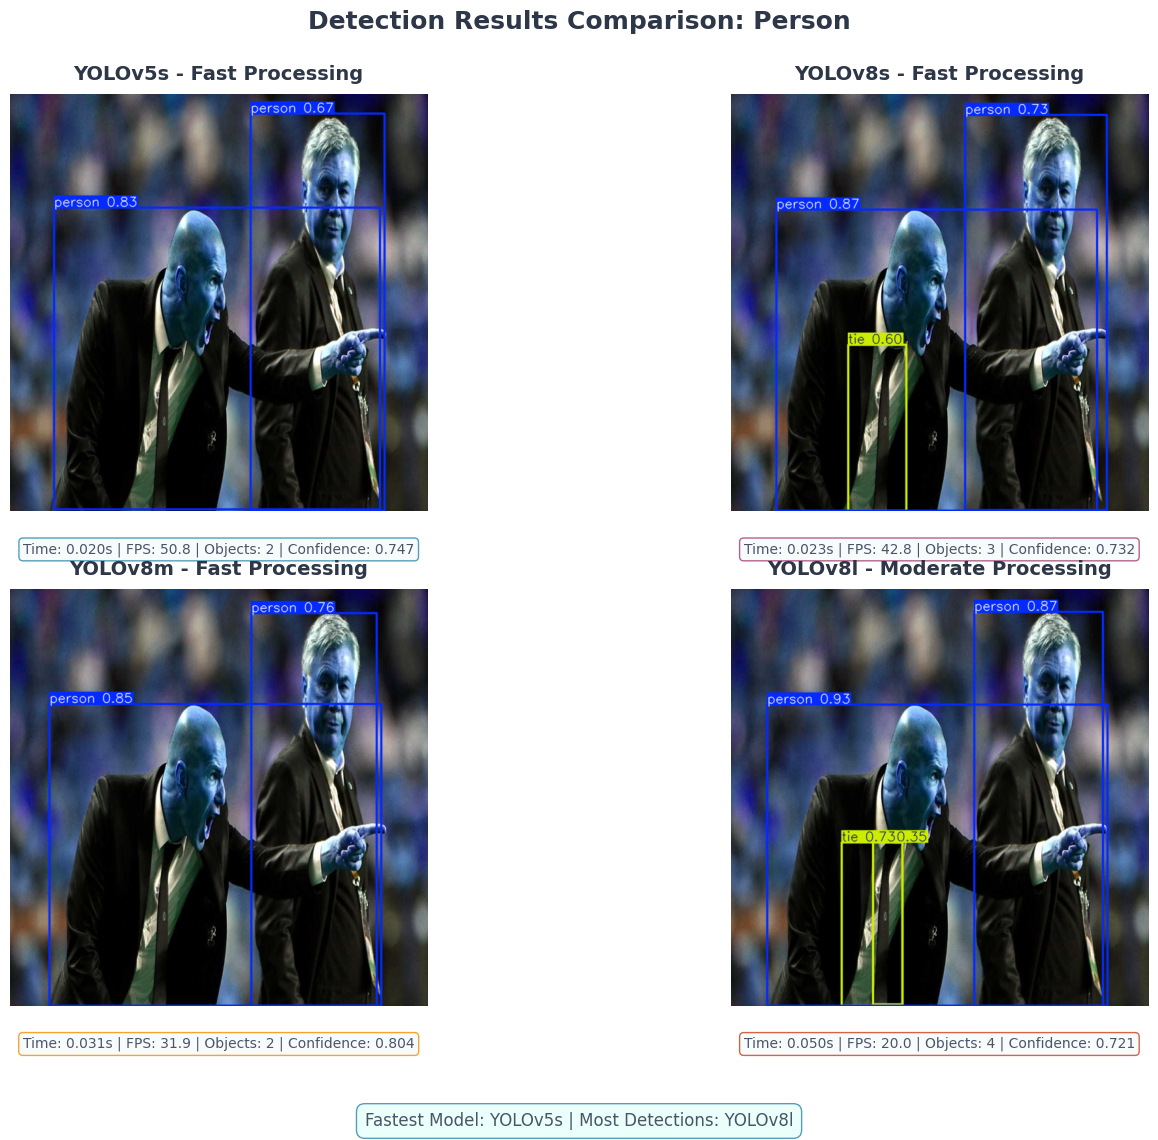

Analysis complete for person

Testing Image 3/5: dogs
------------------------------
Testing YOLOv5s...
  Time: 0.025s (40.7 FPS)
  Detections: 7
  Avg Confidence: 0.805

Testing YOLOv8s...
  Time: 0.025s (40.0 FPS)
  Detections: 8
  Avg Confidence: 0.698

Testing YOLOv8m...
  Time: 0.034s (29.0 FPS)
  Detections: 8
  Avg Confidence: 0.766

Testing YOLOv8l...
  Time: 0.044s (22.8 FPS)
  Detections: 7
  Avg Confidence: 0.868

Creating dashboard for dogs...


Creating detection comparison for dogs...


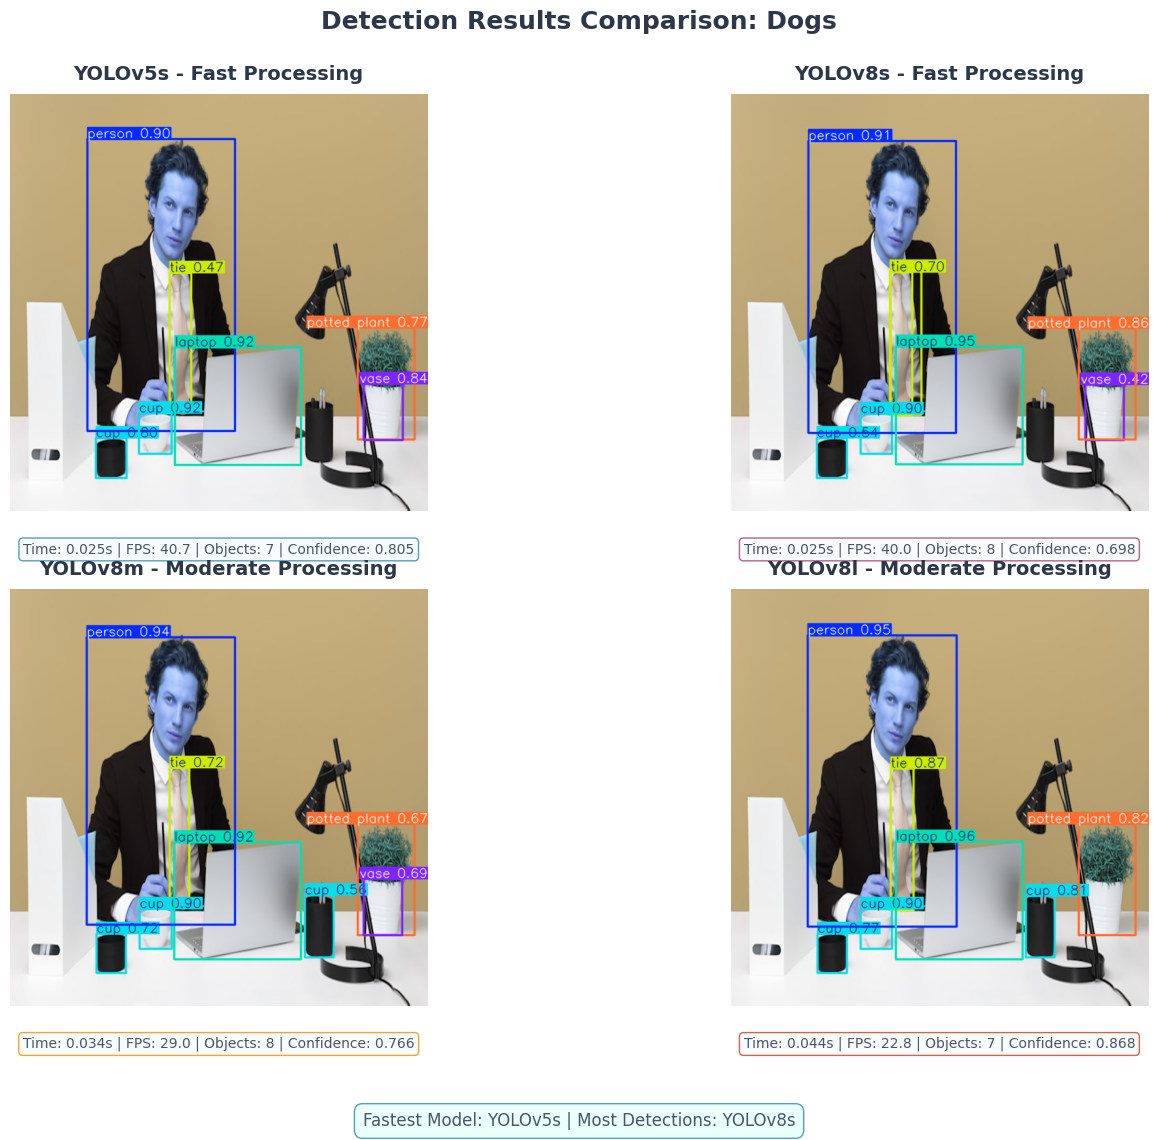

Analysis complete for dogs

Testing Image 4/5: street
------------------------------
Testing YOLOv5s...
  Time: 0.023s (44.0 FPS)
  Detections: 25
  Avg Confidence: 0.490

Testing YOLOv8s...
  Time: 0.021s (46.6 FPS)
  Detections: 25
  Avg Confidence: 0.495

Testing YOLOv8m...
  Time: 0.042s (24.0 FPS)
  Detections: 27
  Avg Confidence: 0.547

Testing YOLOv8l...
  Time: 0.066s (15.1 FPS)
  Detections: 21
  Avg Confidence: 0.530

Creating dashboard for street...


Creating detection comparison for street...


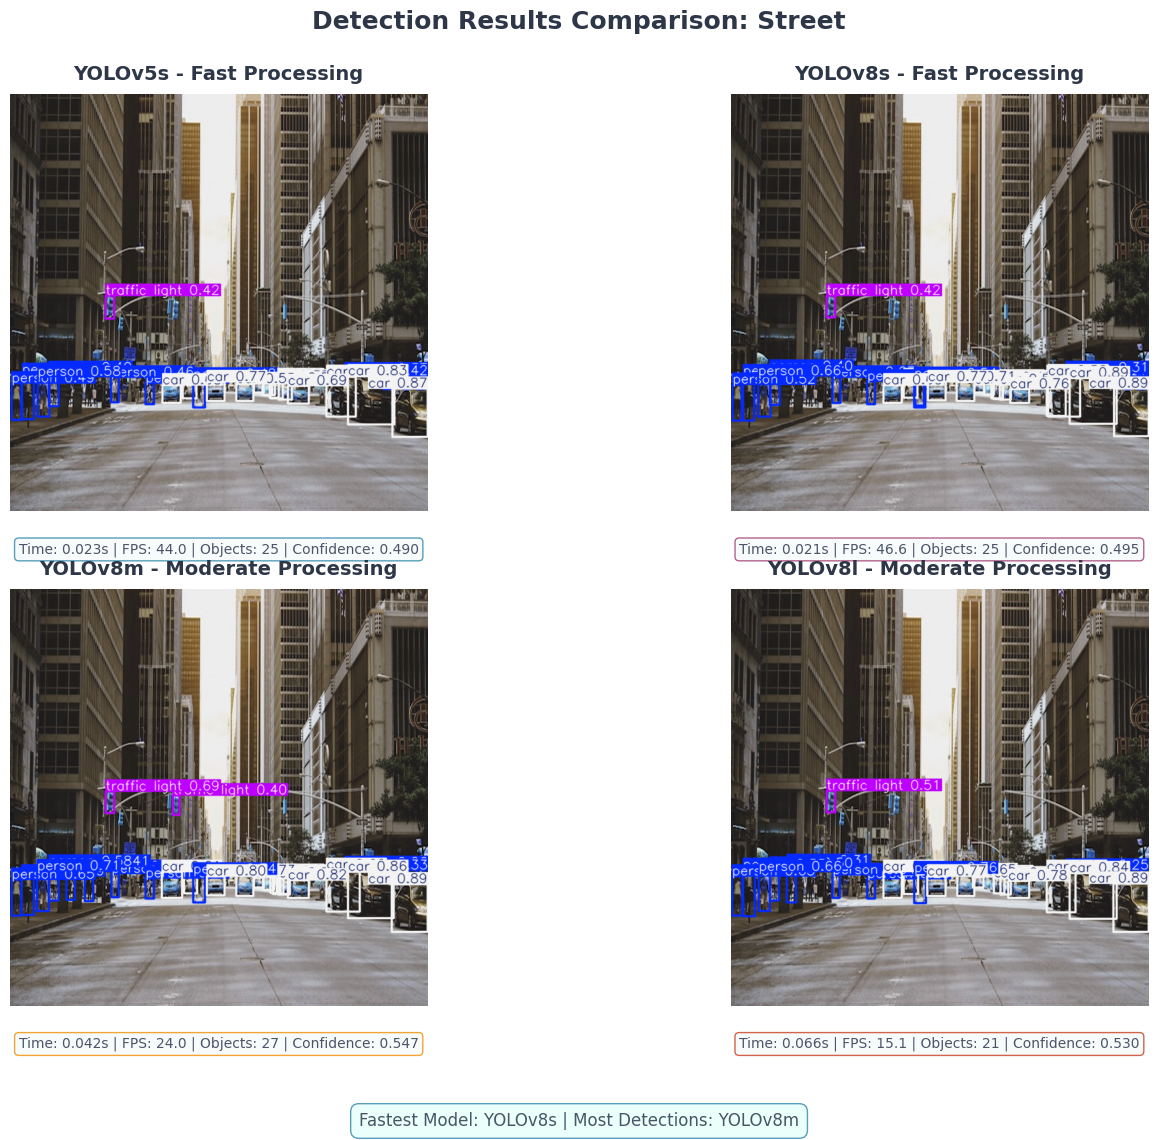

Analysis complete for street

Testing Image 5/5: nature
------------------------------
Testing YOLOv5s...
  Time: 0.020s (49.4 FPS)
  Detections: 0
  Avg Confidence: 0.000

Testing YOLOv8s...
  Time: 0.026s (38.6 FPS)
  Detections: 0
  Avg Confidence: 0.000

Testing YOLOv8m...
  Time: 0.041s (24.4 FPS)
  Detections: 0
  Avg Confidence: 0.000

Testing YOLOv8l...
  Time: 0.071s (14.0 FPS)
  Detections: 0
  Avg Confidence: 0.000

Creating dashboard for nature...


Creating detection comparison for nature...


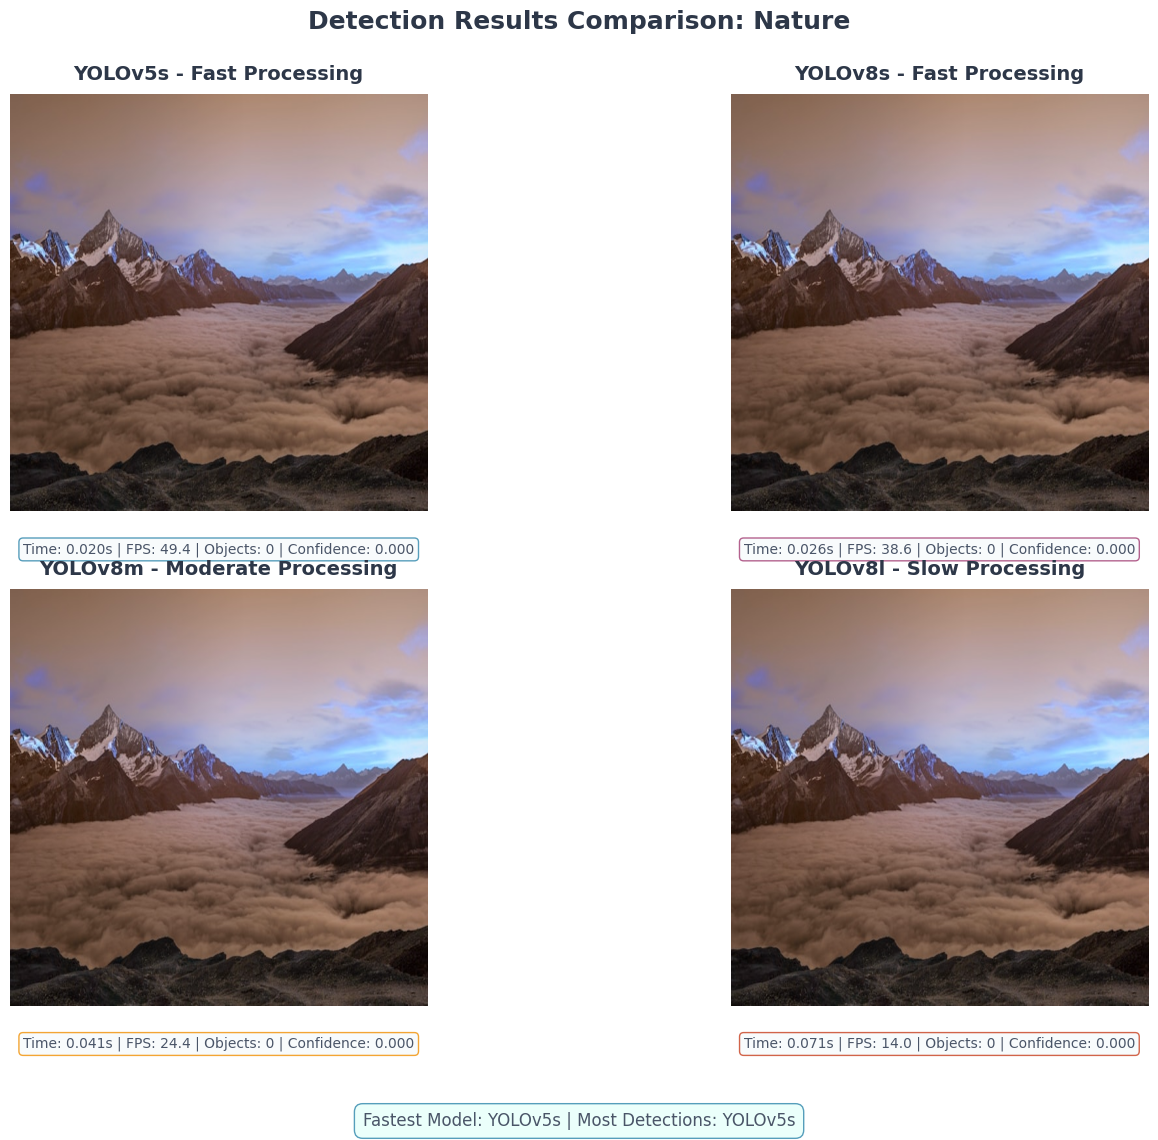

Analysis complete for nature


In [32]:
def comparison_dashboard(results, image_name):
    """
    Interactive dashboard for model comparison
    """
    # Professional color scheme
    colors = {
        'primary': '#2E86AB',
        'secondary': '#A23B72',
        'accent': '#F18F01',
        'success': '#C73E1D',
        'text': '#2D3748',
        'background': '#F7FAFC',
        'grid': '#E2E8F0'
    }

    # Extract data for plotting
    model_names = list(results.keys())
    inference_times = [results[name]['inference_time'] for name in model_names]
    fps_values = [results[name]['fps'] for name in model_names]
    num_detections = [results[name]['num_detections'] for name in model_names]
    avg_confidences = [results[name]['avg_confidence'] for name in model_names]

    # Create subplots with better spacing
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Inference Time (Lower = Better)', 'Processing Speed (Higher = Better)',
                       'Objects Detected', 'Detection Confidence'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]],
        horizontal_spacing=0.12,
        vertical_spacing=0.15
    )

    # Color scheme for bars
    bar_colors = [colors['primary'], colors['secondary'], colors['accent'], colors['success']]

    # 1. Inference Time (Lower is better)
    fig.add_trace(
        go.Bar(
            x=model_names,
            y=inference_times,
            name='Inference Time',
            marker=dict(
                color=bar_colors[0],
                line=dict(color='white', width=1)
            ),
            text=[f'{t:.3f}s' for t in inference_times],
            textposition='auto',
            textfont=dict(color='white', size=11, family="Arial"),
            hovertemplate="<b>%{x}</b><br>" +
                         "Inference Time: %{y:.3f}s<br>" +
                         "<extra></extra>"
        ),
        row=1, col=1
    )

    # 2. FPS (Higher is better)
    fig.add_trace(
        go.Bar(
            x=model_names,
            y=fps_values,
            name='FPS',
            marker=dict(
                color=bar_colors[1],
                line=dict(color='white', width=1)
            ),
            text=[f'{f:.1f}' for f in fps_values],
            textposition='auto',
            textfont=dict(color='white', size=11, family="Arial"),
            hovertemplate="<b>%{x}</b><br>" +
                         "FPS: %{y:.1f}<br>" +
                         "Real-time: %{customdata}<br>" +
                         "<extra></extra>",
            customdata=["Yes" if fps > 30 else "No" for fps in fps_values]
        ),
        row=1, col=2
    )

    # 3. Number of Detections
    fig.add_trace(
        go.Bar(
            x=model_names,
            y=num_detections,
            name='Detections',
            marker=dict(
                color=bar_colors[2],
                line=dict(color='white', width=1)
            ),
            text=[f'{d}' for d in num_detections],
            textposition='auto',
            textfont=dict(color='white', size=11, family="Arial"),
            hovertemplate="<b>%{x}</b><br>" +
                         "Objects Found: %{y}<br>" +
                         "<extra></extra>"
        ),
        row=2, col=1
    )

    # 4. Average Confidence
    fig.add_trace(
        go.Bar(
            x=model_names,
            y=avg_confidences,
            name='Confidence',
            marker=dict(
                color=bar_colors[3],
                line=dict(color='white', width=1)
            ),
            text=[f'{c:.3f}' for c in avg_confidences],
            textposition='auto',
            textfont=dict(color='white', size=11, family="Arial"),
            hovertemplate="<b>%{x}</b><br>" +
                         "Avg Confidence: %{y:.3f}<br>" +
                         "Quality: %{customdata}<br>" +
                         "<extra></extra>",
            customdata=["High" if c > 0.5 else "Medium" if c > 0.3 else "Low" for c in avg_confidences]
        ),
        row=2, col=2
    )

    # Update layout with proper styling
    fig.update_layout(
        title=dict(
            text=f"Performance Analysis: {image_name.title()}<br><sub>Model comparison across key metrics</sub>",
            x=0.5,
            font=dict(size=18, color=colors['text'], family="Arial")
        ),
        showlegend=False,
        height=600,
        plot_bgcolor=colors['background'],
        paper_bgcolor='white',
        font=dict(color=colors['text'], size=12, family="Arial"),
        margin=dict(l=60, r=60, t=100, b=60)
    )

    # Update axes with proper colors
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor=colors['grid'],
        tickfont=dict(color=colors['text'], size=10),
        titlefont=dict(color=colors['text'], size=12)
    )
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor=colors['grid'],
        tickfont=dict(color=colors['text'], size=10),
        titlefont=dict(color=colors['text'], size=12)
    )

    # Update subplot titles
    fig.update_annotations(font=dict(size=14, color=colors['text'], family="Arial"))

    return fig

def Detection_comparison(results, image_name):
    """
    Side-by-side detection comparison
    """
    num_models = len(results)

    # Calculate grid dimensions
    cols = 2
    rows = (num_models + cols - 1) // cols

    # Create figure with white background
    fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 6))
    fig.patch.set_facecolor('white')

    # Handle single row case
    if rows == 1 and num_models > 1:
        axes = axes.reshape(1, -1)
    elif num_models == 1:
        axes = np.array([axes]) if rows == 1 else axes

    # Flatten axes for easier indexing
    if num_models > 1:
        axes_flat = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes_flat = [axes]

    # Professional colors
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

    for i, (model_name, result) in enumerate(results.items()):
        ax = axes_flat[i]

        # Convert BGR to RGB for display
        img_rgb = cv2.cvtColor(result['annotated_image'], cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)

        # Create informative title
        speed_class = "Fast" if result['fps'] > 30 else "Moderate" if result['fps'] > 15 else "Slow"
        confidence_class = "High Confidence" if result['avg_confidence'] > 0.7 else "Medium Confidence" if result['avg_confidence'] > 0.4 else "Low Confidence"

        title = f"{model_name} - {speed_class} Processing"
        subtitle = f"Time: {result['inference_time']:.3f}s | FPS: {result['fps']:.1f} | Objects: {result['num_detections']} | Confidence: {result['avg_confidence']:.3f}"

        ax.set_title(title,
                    fontsize=14,
                    color='#2D3748',
                    fontweight='bold',
                    pad=10)

        # Add metrics below
        ax.text(0.5, -0.1, subtitle,
                transform=ax.transAxes,
                fontsize=10,
                color='#4A5568',
                ha='center',
                bbox=dict(boxstyle="round,pad=0.3",
                         facecolor='#F7FAFC',
                         edgecolor=colors[i % len(colors)],
                         alpha=0.8))

        # Add colored border
        for spine in ax.spines.values():
            spine.set_edgecolor(colors[i % len(colors)])
            spine.set_linewidth(3)

        ax.axis('off')

    # Hide unused subplots
    for j in range(num_models, len(axes_flat)):
        axes_flat[j].axis('off')

    # Main title
    fig.suptitle(f'Detection Results Comparison: {image_name.title()}',
                fontsize=18,
                fontweight='bold',
                color='#2D3748',
                y=0.95)

    # Add summary
    if results:
        best_speed = max(results.keys(), key=lambda x: results[x]['fps'])
        best_detection = max(results.keys(), key=lambda x: results[x]['num_detections'])

        summary = f"Fastest Model: {best_speed} | Most Detections: {best_detection}"
        fig.text(0.5, 0.02, summary,
                 ha='center',
                 fontsize=12,
                 color='#4A5568',
                 bbox=dict(boxstyle="round,pad=0.5",
                          facecolor='#E6FFFA',
                          edgecolor='#2E86AB',
                          alpha=0.8))

    plt.tight_layout()
    plt.subplots_adjust(top=0.88, bottom=0.12)

    return fig

def create_visuals():
    """
    Create professional, informative visualizations for presentations
    """

    # Professional color scheme
    colors = {
        'primary': '#2E86AB',
        'secondary': '#A23B72',
        'accent': '#F18F01',
        'success': '#C73E1D',
        'text': '#2D3748',
        'background': '#F7FAFC',
        'grid': '#E2E8F0'
    }

    # 1. Evolution Timeline
    fig = go.Figure()

    models = ['YOLOv5s', 'YOLOv8s', 'YOLOv8m', 'YOLOv8l']
    years = [2020, 2023, 2023, 2023]
    model_colors = [colors['primary'], colors['secondary'], colors['accent'], colors['success']]

    if len(yolo_models) > 0:
        # Get average performance metrics
        avg_fps = summary_df.groupby('Model')['FPS'].mean()
        avg_confidence = summary_df.groupby('Model')['Avg_Confidence'].mean()

        # Create enhanced bubble chart
        for i, model in enumerate(models):
            if model in avg_fps.index:
                fig.add_trace(go.Scatter(
                    x=[years[i]],
                    y=[avg_fps[model]],
                    mode='markers+text',
                    marker=dict(
                        size=avg_confidence[model] * 120,
                        color=model_colors[i],
                        line=dict(width=2, color='white'),
                        opacity=0.8
                    ),
                    text=f"{model}<br>{avg_fps[model]:.1f} FPS",
                    textposition="middle center",
                    textfont=dict(color='white', size=12, family="Arial Black"),
                    name=model,
                    hovertemplate=f"<b>{model}</b><br>" +
                                 f"Year: {years[i]}<br>" +
                                 f"FPS: {avg_fps[model]:.1f}<br>" +
                                 f"Confidence: {avg_confidence[model]:.3f}<br>" +
                                 "<extra></extra>"
                ))

    fig.update_layout(
        title=dict(
            text="YOLO Evolution: Performance Over Time<br><sub>Bubble size represents average confidence score</sub>",
            x=0.5,
            font=dict(size=20, color=colors['text'], family="Arial")
        ),
        xaxis=dict(
            title="Release Year",
            titlefont=dict(size=14, color=colors['text']),
            tickfont=dict(size=12, color=colors['text']),
            showgrid=True,
            gridcolor=colors['grid'],
            range=[2019, 2024]
        ),
        yaxis=dict(
            title="Processing Speed (FPS)",
            titlefont=dict(size=14, color=colors['text']),
            tickfont=dict(size=12, color=colors['text']),
            showgrid=True,
            gridcolor=colors['grid']
        ),
        plot_bgcolor=colors['background'],
        paper_bgcolor='white',
        showlegend=True,
        legend=dict(
            x=0.02,
            y=0.98,
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor=colors['grid'],
            borderwidth=1
        ),
        height=500,
        margin=dict(l=60, r=60, t=100, b=60)
    )

    fig.show()

    # 2. Speed Comparison
    fig2 = go.Figure()

    if len(yolo_models) > 0:
        model_names = list(avg_fps.index)
        fps_values = [avg_fps[model] for model in model_names]

        # Sort by FPS for better visualization
        sorted_data = sorted(zip(model_names, fps_values), key=lambda x: x[1], reverse=True)
        sorted_models, sorted_fps = zip(*sorted_data)

        colors_gradient = [colors['success'], colors['accent'], colors['secondary'], colors['primary']]

        fig2.add_trace(go.Bar(
            y=sorted_models,
            x=sorted_fps,
            orientation='h',
            marker=dict(
                color=colors_gradient[:len(sorted_models)],
                line=dict(color='white', width=1)
            ),
            text=[f'{fps:.1f} FPS' for fps in sorted_fps],
            textposition='auto',
            textfont=dict(color='white', size=12, family="Arial Black"),
            hovertemplate="<b>%{y}</b><br>" +
                         "Speed: %{x:.1f} FPS<br>" +
                         "Rank: #%{customdata}<br>" +
                         "<extra></extra>",
            customdata=list(range(1, len(sorted_models) + 1))
        ))

    fig2.update_layout(
        title=dict(
            text="Speed Comparison: YOLO Performance Rankings<br><sub>Higher FPS = Better real-time performance</sub>",
            x=0.5,
            font=dict(size=20, color=colors['text'], family="Arial")
        ),
        xaxis=dict(
            title="Processing Speed (Frames Per Second)",
            titlefont=dict(size=14, color=colors['text']),
            tickfont=dict(size=12, color=colors['text']),
            showgrid=True,
            gridcolor=colors['grid']
        ),
        yaxis=dict(
            title="YOLO Model",
            titlefont=dict(size=14, color=colors['text']),
            tickfont=dict(size=12, color=colors['text'])
        ),
        plot_bgcolor=colors['background'],
        paper_bgcolor='white',
        height=400,
        margin=dict(l=100, r=60, t=100, b=60)
    )

    fig2.show()

    # 3. Performance Matrix
    if len(yolo_models) > 0:
        metrics = ['Speed (FPS)', 'Detection Count', 'Confidence Score']
        performance_matrix = []
        raw_values = []

        for model in model_names:
            speed_val = avg_fps[model]
            detection_val = summary_df[summary_df['Model'] == model]['Detections'].mean()
            confidence_val = summary_df[summary_df['Model'] == model]['Avg_Confidence'].mean()

            raw_values.append([speed_val, detection_val, confidence_val])
            performance_matrix.append([speed_val, detection_val, confidence_val])

                # Normalize for heatmap (0-1 scale)
        performance_matrix = np.array(performance_matrix)
        max_vals = performance_matrix.max(axis=0)
        min_vals = performance_matrix.min(axis=0)
        range_vals = max_vals - min_vals
        normalized_matrix = np.where(range_vals == 0, 0.5, (performance_matrix - min_vals) / range_vals)

        # Create annotations with actual values
        annotations = []
        for i, model in enumerate(model_names):
            for j, metric in enumerate(metrics):
                annotations.append(
                    dict(
                        x=j, y=i,
                        text=f"{raw_values[i][j]:.1f}",
                        showarrow=False,
                        font=dict(color="white", size=12, family="Arial Black")
                    )
                )

        fig3 = go.Figure(data=go.Heatmap(
            z=normalized_matrix,
            x=metrics,
            y=model_names,
            colorscale='RdYlBu_r',
            showscale=True,
            colorbar=dict(
                title="Performance Score<br>(0=Min, 1=Max)",
                titlefont=dict(color=colors['text']),
                tickfont=dict(color=colors['text']),
                x=1.02
            ),
            hovertemplate="<b>%{y}</b><br>" +
                         "%{x}: %{text}<br>" +
                         "Normalized Score: %{z:.2f}<br>" +
                         "<extra></extra>",
            text=[[f"{raw_values[i][j]:.1f}" for j in range(len(metrics))] for i in range(len(model_names))]
        ))

        fig3.update_layout(
            title=dict(
                text="Performance Matrix: Complete Model Comparison<br><sub>Actual values shown, colors represent relative performance</sub>",
                x=0.5,
                font=dict(size=20, color=colors['text'], family="Arial")
            ),
            xaxis=dict(
                title="Performance Metrics",
                titlefont=dict(size=14, color=colors['text']),
                tickfont=dict(size=12, color=colors['text']),
                side='bottom'
            ),
            yaxis=dict(
                title="YOLO Models",
                titlefont=dict(size=14, color=colors['text']),
                tickfont=dict(size=12, color=colors['text'])
            ),
            plot_bgcolor='white',
            paper_bgcolor='white',
            height=400,
            margin=dict(l=100, r=120, t=100, b=60),
            annotations=annotations
        )

        fig3.show()

    # 4. Speed vs Accuracy Trade-off
    if len(yolo_models) > 0:
        fig4 = go.Figure()

        for i, model in enumerate(model_names):
            speed = avg_fps[model]
            accuracy = summary_df[summary_df['Model'] == model]['Avg_Confidence'].mean()
            detections = summary_df[summary_df['Model'] == model]['Detections'].mean()

            fig4.add_trace(go.Scatter(
                x=[speed],
                y=[accuracy],
                mode='markers+text',
                marker=dict(
                    size=detections * 10,
                    color=model_colors[i % len(model_colors)],
                    line=dict(width=2, color='white'),
                    opacity=0.8
                ),
                text=model,
                textposition="middle center",
                textfont=dict(color='white', size=10, family="Arial Black"),
                name=model,
                hovertemplate=f"<b>{model}</b><br>" +
                             f"Speed: {speed:.1f} FPS<br>" +
                             f"Confidence: {accuracy:.3f}<br>" +
                             f"Avg Detections: {detections:.1f}<br>" +
                             "<extra></extra>"
            ))

        fig4.update_layout(
            title=dict(
                text="Speed vs Accuracy Trade-off Analysis<br><sub>Bubble size represents average detection count</sub>",
                x=0.5,
                font=dict(size=20, color=colors['text'], family="Arial")
            ),
            xaxis=dict(
                title="Processing Speed (FPS)",
                titlefont=dict(size=14, color=colors['text']),
                tickfont=dict(size=12, color=colors['text']),
                showgrid=True,
                gridcolor=colors['grid']
            ),
            yaxis=dict(
                title="Average Confidence Score",
                titlefont=dict(size=14, color=colors['text']),
                tickfont=dict(size=12, color=colors['text']),
                showgrid=True,
                gridcolor=colors['grid']
            ),
            plot_bgcolor=colors['background'],
            paper_bgcolor='white',
            showlegend=False,
            height=500,
            margin=dict(l=60, r=60, t=100, b=60)
        )

        fig4.show()

    print("visualizations created successfully!")


def run_analysis():
    """
    Run the complete YOLO evolution analysis
    """


    all_results = {}

    # Test each image
    for i, (image, name) in enumerate(zip(sample_images, image_names)):
        print(f"\nTesting Image {i+1}/{len(sample_images)}: {name}")
        print("-" * 30)

        # Run comparison
        results = compare_yolo_performance(image, yolo_models, name)
        all_results[name] = results

        # Create visualizations
        print(f"Creating dashboard for {name}...")
        performance_fig = create_professional_comparison_dashboard(results, name)
        performance_fig.show()

        print(f"Creating detection comparison for {name}...")
        detection_fig = create_professional_detection_comparison(results, name)
        plt.show()

        print("Analysis complete for", name)


    return all_results


# Create professional visuals
create_visuals()

# Run professional analysis
analysis_results = run_analysis()


In [26]:
def create_performance_animation():
    """
    Create an animated GIF showing model performance evolution
    """
    print("Creating performance animation...")

    if len(yolo_models) == 0:
        print("No models loaded, skipping animation")
        return

    # Create frames for animation
    frames = []
    model_names = list(yolo_models.keys())

    for i in range(len(model_names) + 1):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        fig.patch.set_facecolor('black')

        # Current models to show
        current_models = model_names[:i] if i > 0 else []

        if current_models:
            # Speed comparison
            current_fps = [summary_df[summary_df['Model'] == model]['FPS'].mean()
                          for model in current_models]

            bars1 = ax1.bar(current_models, current_fps,
                           color=plt.cm.plasma(np.linspace(0, 1, len(current_models))))
            ax1.set_title('Speed (FPS)', color='white', fontsize=14)
            ax1.set_ylabel('Frames Per Second', color='white')
            ax1.tick_params(colors='white')
            ax1.set_facecolor('black')

            # Add value labels on bars
            for bar, fps in zip(bars1, current_fps):
                ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                        f'{fps:.1f}', ha='center', va='bottom', color='white', fontweight='bold')

            # Detection count
            current_detections = [summary_df[summary_df['Model'] == model]['Detections'].mean()
                                for model in current_models]

            bars2 = ax2.bar(current_models, current_detections,
                           color=plt.cm.viridis(np.linspace(0, 1, len(current_models))))
            ax2.set_title('Average Detections', color='white', fontsize=14)
            ax2.set_ylabel('Number of Objects', color='white')
            ax2.tick_params(colors='white')
            ax2.set_facecolor('black')

            # Add value labels on bars
            for bar, det in zip(bars2, current_detections):
                ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                        f'{det:.1f}', ha='center', va='bottom', color='white', fontweight='bold')

        # Set consistent y-axis limits
        ax1.set_ylim(0, max([summary_df[summary_df['Model'] == model]['FPS'].mean()
                            for model in model_names]) * 1.2)
        ax2.set_ylim(0, max([summary_df[summary_df['Model'] == model]['Detections'].mean()
                            for model in model_names]) * 1.2)

        plt.suptitle(f'YOLO Evolution: Model Performance Comparison\nShowing {len(current_models)} of {len(model_names)} models',
                     color='white', fontsize=16, fontweight='bold')
        plt.tight_layout()

        # Save frame
        buf = io.BytesIO()
        plt.savefig(buf, format='png', facecolor='black', edgecolor='none', dpi=100)
        buf.seek(0)
        frames.append(Image.open(buf))
        plt.close()

    # Create GIF
    frames[0].save(
        'yolo_performance_evolution.gif',
        save_all=True,
        append_images=frames[1:],
        duration=1500,  # 1.5 seconds per frame
        loop=0
    )

    return frames

# Create animation
animation_frames = create_performance_animation()

Creating performance animation...
